## Final Project Submission

Please fill out:
* Student name: PETER KARIUKI ELIZABETH
* Student pace: full time
* Scheduled project review date/time: 3rd JULY 2023
* Instructor name: ANTHONNY MUIKO

### Business Understanding
My Space Agency serves the King County community by providing prospective home sellers with guidance on how to improve the value of their home before listing for sale. 
#### Business Problem
- The Agency's primary aim is to provide prospective home sellers with guidance on how to improve the value of their home prior to listing, including the predicted increase in value expected based on improvements to particular features.
#### Business Question
- What features of their home can prospective home sellers change or improve to increase the value of their home, and how much could this increase be specific to certain features?
These recommendations derived from this report would be valuable to My Space Agency Realtors because it would help prospective home sellers confidently ascertain how they can improve the value of their home, and if the investment is worth the cost.

### Data Understanding
This project uses the King County House Sales dataset because My Space Agency and its prospective homesellers are all based in King County. The dataset itself can be found in kc_house_data.csv in the data folder of this GitHub repository along with the descriptions of the features, found in column_names.md.

The original dataset includes sales data for 21,597 homes with 20 different features, which include:

- date - Date house was sold
- price - Sale price (prediction target)
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - Square footage of living space in the home
- sqft_lot - Square footage of the lot
- floors - Number of floors (levels) in house
- waterfront - Whether the house is on a waterfront
- view - Quality of view from house
- condition - How good the overall condition of the house is. Related to maintenance of house
- grade - Overall grade of the house. Related to the construction and design of the house
- sqft_above - Square footage of house apart from basement
- sqft_basement - Square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - ZIP Code used by the United States Postal Service

### Data Preparations

#### Data Review and Processing

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import json
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats


In [2]:
#read data
data = pd.read_csv("Data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#inspect columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data.shape

(21597, 21)

In [5]:
#inspect all columns with there datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#select the necessary columns used for analysis
#inspect these columns - missing values and datatypes
selected_data = data.drop(["id", "view", "date", "sqft_above", "sqft_basement", "yr_renovated", 
            "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"], axis=1)
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


In [7]:
selected_data.shape

(21597, 10)

###### Observation
- 'Waterfont' has some missing values.


### Data Cleaning

In [8]:
#check for null values
selected_data.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [9]:
#Assume missing values in waterfont is abscence of waterfront and replace with a 0.0
selected_data['waterfront'].replace("YES", 1, inplace = True)
selected_data['waterfront'].replace("NO", 0, inplace = True)
selected_data['waterfront'].fillna(value = 0, inplace = True)

In [10]:
#check for most common value
selected_data["waterfront"].isnull().sum()

0

In [11]:
selected_data["waterfront"].value_counts()

waterfront
0.0    21451
1.0      146
Name: count, dtype: int64

In [12]:
#recheck for null values
selected_data.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [13]:
#convert sqft_lot, sqft_living, waterfront,and bedrooms to float
selected_data['bedrooms'] = selected_data['bedrooms'].astype(float)
selected_data['sqft_living'] = selected_data['sqft_living'].astype(float)
selected_data['sqft_lot'] = selected_data['sqft_lot'].astype(float)
selected_data['waterfront'] = selected_data['waterfront'].astype(float)

In [14]:
selected_data.dtypes

price          float64
bedrooms       float64
bathrooms      float64
sqft_living    float64
sqft_lot       float64
floors         float64
waterfront     float64
condition       object
grade           object
yr_built         int64
dtype: object

In [15]:
selected_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,2015.000000


In [16]:
#drop row with 33 bedrooms, considered as an outlier
selected_data = selected_data[(selected_data.bedrooms != 33)]

### Data Analysis
The data analysis process is used to explore the distributions of different columns and examine descriptive characteristics for the dataset. These are use to create visualizations to help understand the relationship between price and other variables. 
#### How to increase estimated price of the homes
This is done through the exploratory data analysis of the target variable, 'price' and developing the ordinary least square model to check its relationship with home features. 

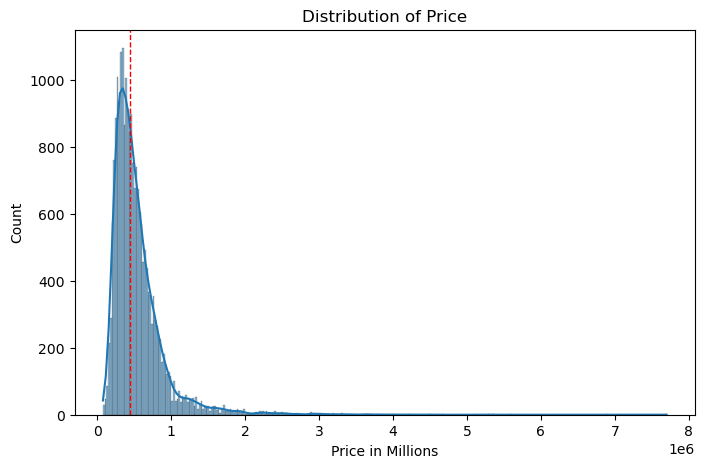

Text(0.5, 1.0, 'Price QQPlot')

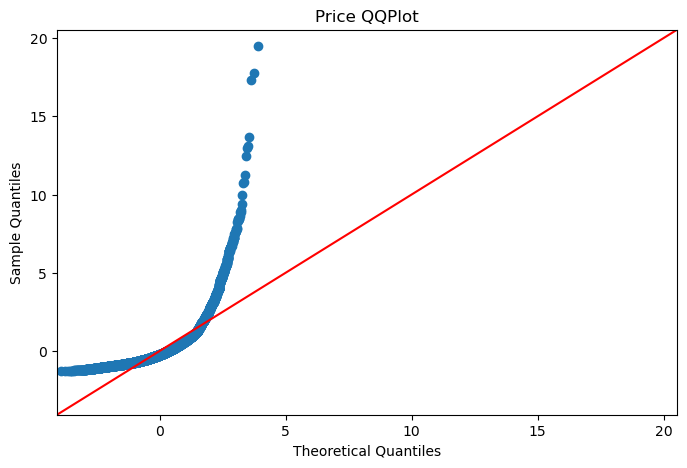

In [17]:
#plot 'price' and check for normality
plt.figure(figsize = (8, 5))
sns.histplot(selected_data['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price in Millions')
plt.axvline(selected_data['price'].median(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()

fig = sm.graphics.qqplot(selected_data['price'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(8, 5)
plt.title('Price QQPlot')

In [18]:
#Test for skewness and kurtosis
print('Skewness:', selected_data['price'].skew())

print('Kurtosis:', selected_data['price'].kurtosis())

Skewness: 4.023328880340934
Kurtosis: 34.54007878960593


This shows that the 'price' is highly skewed and has heavy outliers.

In [19]:
#remove the 'price' outliers in the top 5% of the observations

selected_data = selected_data.query('price < price.quantile(.95)')

#check for skewness and kurtosis
print('Skewness:', selected_data['price'].skew())

print('Kurtosis:', selected_data['price'].kurtosis())

Skewness: 0.7850170933496895
Kurtosis: 0.1038968014601438


##### Visualize number of homes based on condition and grade

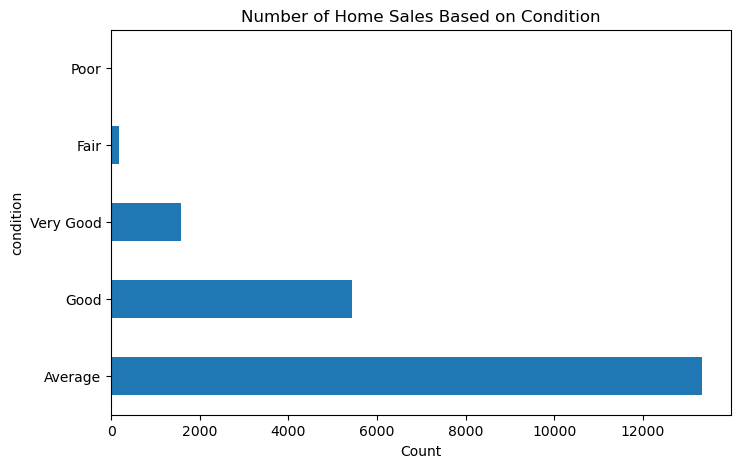

In [20]:
fig, ax = plt.subplots(figsize = (8,5))

selected_data['condition'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Condition')
ax.set_xlabel('Count');

Most homes had average conditions, followed by good conditions.

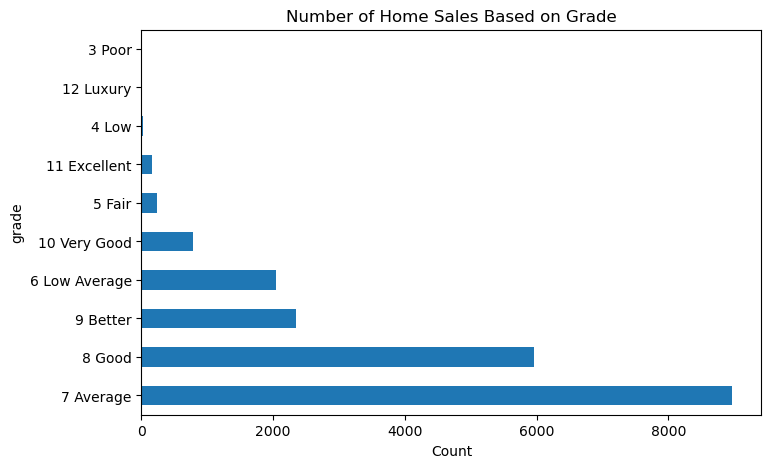

In [21]:
fig, ax = plt.subplots(figsize = (8,5))

selected_data['grade'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Grade')
ax.set_xlabel('Count');

Most homes had an average grade, followed by good grade.

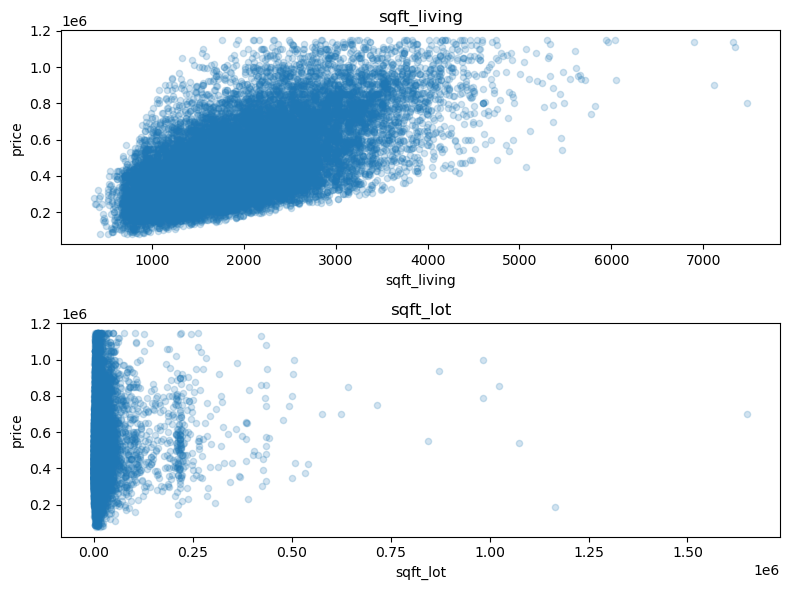

In [22]:
#Visualize continous variables to see their relationship with price for explanatory purposes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

for xcol, ax in zip(['sqft_living', 'sqft_lot'], axes):
    selected_data.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha=0.2)
    
    ax.set_title(xcol)               
    
fig.tight_layout()

We can see a linear relationship between price and sqft_living

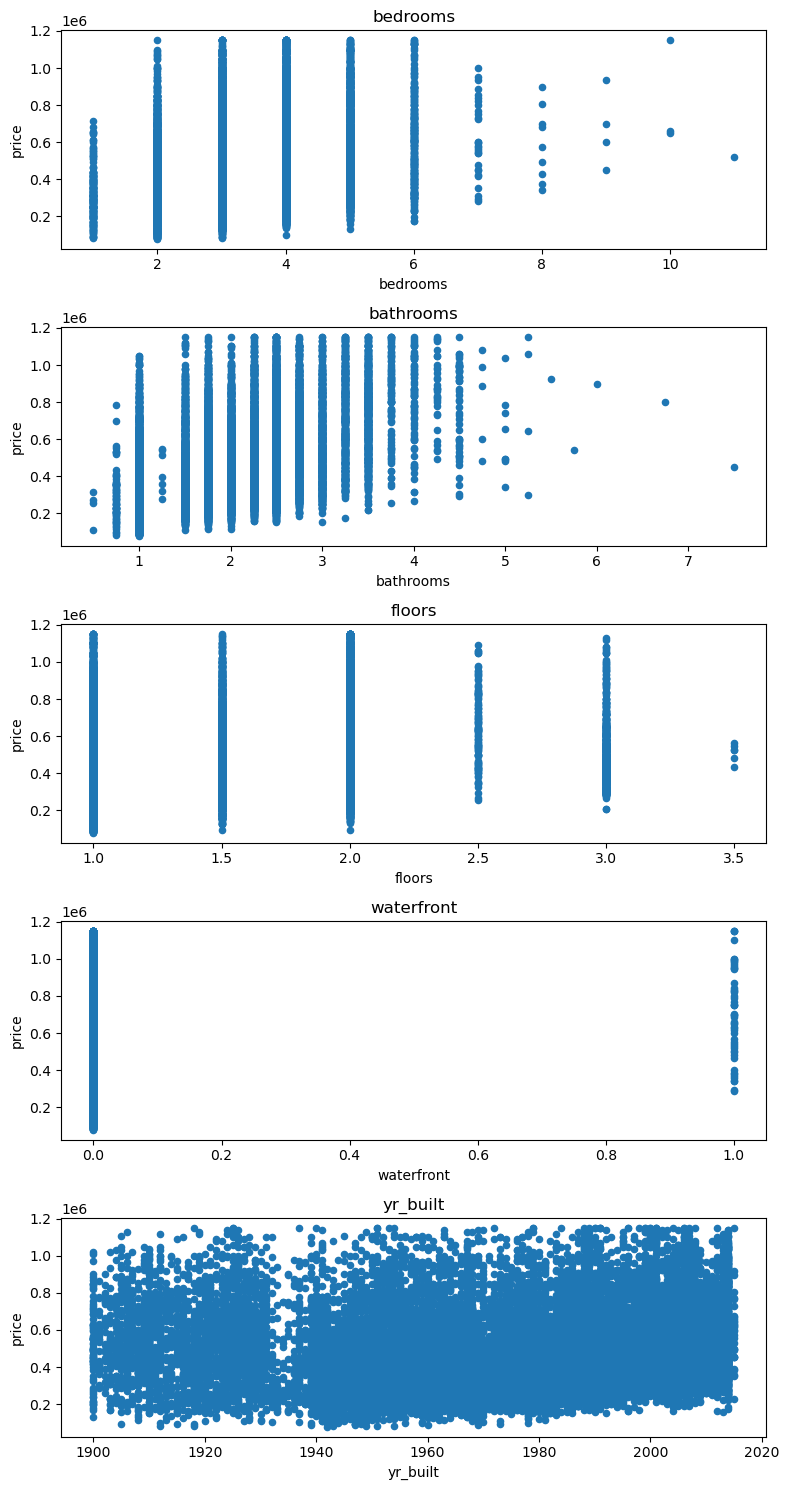

In [23]:
# Visualization for other variables
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'yr_built'], axes):
    selected_data.plot(kind='scatter', x=xcol, y='price', ax=ax)  # Use 'ax' instead of 'axes'
    
    ax.set_title(xcol)

fig.tight_layout()

These figures shows no linear relationship with price. We need to provide prospective home sellers with guidance on how to improve the value of their home prior to listing, including the predicted increase in value expected based on improvements to particular features.This could be done by the features of the homes that prospective home sellers can change or improve to increase the value of the homes, and by amount could this increase be specific to certain features?

### Exploratory Correlations

We are showing correlation and using regression coefficients in this analysis to be able to show the relationship between one or more features with sale price.

Using regression and interpreting correlation coefficients is effective for this business problem because it will allow for us to determine how sale price is impacted by different features and to what degree.

Building complex models with multiple features allows for us to be able to make more accurate, data-driven predictions.

In [24]:
# Let's check the correlations in an easy-to-read table
# 0.7-0.9 highly correlated
# 0.5-0.7 moderately correlated
# below 0.5 lowly correlated

columns_of_interest = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'yr_built']
correlation = selected_data[columns_of_interest + ['price']].corr()['price']

print(correlation)

sqft_living    0.627467
sqft_lot       0.097306
bedrooms       0.305761
bathrooms      0.460291
floors         0.273658
waterfront     0.055235
yr_built       0.063988
price          1.000000
Name: price, dtype: float64


##### Observation
- The results show moderate correlation between price and sqft_living and yr_build.
- Other home features, such as bedrooms, bathrooms, floors, waterfront, sqft_lot have low correlation with price.

#### Baseline Model

This is our extremely simple model we will use for comparison throughout our investigation on the features that may affect sale price and to what degree.

Predictors:
- Sqft_living

In [25]:
base_model = ols(formula='price ~ sqft_living', data=selected_data).fit()

mod_summary = base_model.summary()
mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.332e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:58:54   Log-Likelihood:            -2.7546e+05
No. Observations:               20512   AIC:                         5.509e+05
Df Residuals:                   20510   BIC:                         5.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.433e+05   3128.215     45.803      0.000    1.37e+05    1.49e+05
sqft_living   169.4867      1.469    115.408      0.000     166.608     172.365
==============================================================================
Omnibus:                      998.442   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.376
Skew:                           0.561   Prob(JB):                    9.59e-251
Kurtosis:                       3.295   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observation
- The above results implies that sqft living has a high coefficiency and R-squared is valued at 0.392. Thus, only 40% of the variation in price is explained by the model.
- The F-statistic of 0.00 implies that the model is statistically significant.

In [27]:
base_model2 = ols(formula='price ~ grade', data=selected_data).fit()

base_model2_summary = base_model2.summary()
base_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1600.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:58:55   Log-Likelihood:            -2.7514e+05
No. Observations:               20512   AIC:                         5.503e+05
Df Residuals:                   20502   BIC:                         5.504e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                8.15e+05   5786.465    140.845      0.000    8.04e+05    8.26e+05
grade[T.11 Excellent]    1.43e+05   1.42e+04     10.097      0.000    1.15e+05    1.71e+05
grade[T.12 Luxury]       1.62e+05   7.26e+04      2.230      0.026    1.96e+04    3.04e+05
grade[T.3 Poor]         -5.53e+05   1.62e+05     -3.413      0.001   -8.71e+05   -2.35e+05
grade[T.4 Low]          -6.03e+05   3.17e+04    -19.026      0.000   -6.65e+05   -5.41e+05
grade[T.5 Fair]        -5.665e+05   1.19e+04    -47.568      0.000    -5.9e+05   -5.43e+05
grade[T.6 Low Average] -5.135e+05   6808.358    -75.425      0.000   -5.27e+05      -5e+05
grade[T.7 Average]     -4.135e+05   6033.897    -68.532      0.000   -4.25e+05   -4.02e+05
grade[T.8 Good]        -2.883e+05   6155.200    -46.843      0.000      -3e+05   -2.76e+05
grade[T.9 Better]      -1.237e+05   6684.130    -18.512      0.000   -1.37e+05   -1.11e+05
==============================================================================
Omnibus:                     1619.556   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2108.449
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       3.711   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation
- Setting homes to luxury and excellent grades would lead to there prices' increase.

In [30]:

model = ols(formula='price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + yr_built + condition + grade', data=selected_data).fit()

mod_summ = model.summary()
mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1373.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:58:55   Log-Likelihood:            -2.7188e+05
No. Observations:               20512   AIC:                         5.438e+05
Df Residuals:                   20491   BIC:                         5.440e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.913e+06   8.92e+04     66.310      0.000    5.74e+06    6.09e+06
condition[T.Fair]      -4.933e+04   1.09e+04     -4.545      0.000   -7.06e+04   -2.81e+04
condition[T.Good]       1.026e+04   2392.619      4.290      0.000    5573.641     1.5e+04
condition[T.Poor]      -5.165e+04   2.64e+04     -1.959      0.050   -1.03e+05      23.579
condition[T.Very Good]  4.268e+04   3911.644     10.911      0.000     3.5e+04    5.03e+04
grade[T.11 Excellent]   7.627e+04   1.21e+04      6.278      0.000    5.25e+04       1e+05
grade[T.12 Luxury]       141.5446   6.21e+04      0.002      0.998   -1.22e+05    1.22e+05
grade[T.3 Poor]        -4.898e+05   1.38e+05     -3.539      0.000   -7.61e+05   -2.19e+05
grade[T.4 Low]         -4.579e+05   2.76e+04    -16.588      0.000   -5.12e+05   -4.04e+05
grade[T.5 Fair]        -4.593e+05   1.13e+04    -40.524      0.000   -4.81e+05   -4.37e+05
grade[T.6 Low Average] -4.056e+05   7351.824    -55.174      0.000    -4.2e+05   -3.91e+05
grade[T.7 Average]     -3.072e+05   6220.475    -49.380      0.000   -3.19e+05   -2.95e+05
grade[T.8 Good]        -2.012e+05   5777.431    -34.828      0.000   -2.13e+05    -1.9e+05
grade[T.9 Better]      -7.542e+04   5814.573    -12.971      0.000   -8.68e+04    -6.4e+04
bedrooms               -1.652e+04   1440.206    -11.469      0.000   -1.93e+04   -1.37e+04
bathrooms               3.194e+04   2327.237     13.725      0.000    2.74e+04    3.65e+04
sqft_living               90.3725      2.382     37.933      0.000      85.703      95.042
sqft_lot                   0.0172      0.025      0.697      0.486      -0.031       0.065
floors                  3.328e+04   2299.503     14.473      0.000    2.88e+04    3.78e+04
waterfront              1.844e+05   1.89e+04      9.772      0.000    1.47e+05    2.21e+05
yr_built               -2756.2653     45.382    -60.735      0.000   -2845.217   -2667.314
==============================================================================
Omnibus:                      929.223   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.702
Skew:                           0.422   Prob(JB):                    5.06e-299
Kurtosis:                       3.946   Cond. No.                     6.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observation
- The D-W score of 1.963 implies that the model meets the normality assumption.
- The data used in the model also significantly deviated from a normal distribution, since the Jarque-Bera is 1373.702. 
- The null hypothesis states that there is no significant relationship between the price and home features. However, a p-value of 0.00 suggests strong evidence against the null hypothesis, indicating that there is a statistically significant relationship between the price of homes and their features. Thus, the model is a better fit for the data.

### Recommendations

In our final model comprising all features, the model's performance based on adjsuted R-squared improved from 40% to 57.3%. All features also have a statistically linear relationship with price.
- Holding other features constant, the addition of a bathroom increases home prices by 31,940 dollars.
- Holding other features constant, the additional of a floor increases home prices by 33,280 dollars.
- Holding other features constant, improving condition of homes from very good to excellent results to an increase in price from 42,680 dollars to 76,270 dollars.
- Renovation of the homes to a luxury grade would result to a price increase of 141.54 dollars, holding other featurs constant.

Thus, My Space Agency would offer the following recommendations to its home owners;
- Improve the grade of your home (construction quality) at a minimum to luxury. 
- Increasing number of floors to their homes is predited to increase price by 33,280 dollars.
- Each additional square foot of living space is predicted to add 90.37 dollars to the price.
#### Limitations
- The model only explains 57% of the variation in price of homes, and thus we should be cautious with our predictions and conclusions.